# Библиотеки

In [16]:
import pandas as pd #Для обработки массивов
import numpy as np #Для обработки массивов ( в частность еревод картинки в матрицу)
from keras.models import Sequential#Сама модель
import tensorflow as tf
import cv2
from tensorflow import keras
from keras.layers import Dense, Dropout,MaxPool2D , Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator#Для обработки изображений керас
from tensorflow.keras import layers
from tensorflow.keras.utils import load_img #Для обработки изображений керас
from tensorflow.keras.utils import img_to_array #Для обработки изображений керас


In [3]:
from PIL import Image#Загрузка изображений
import matplotlib.pyplot as plt #Визуализация
import matplotlib.image as img#Визуализация
from matplotlib.patches import Rectangle#Визуализация(боксы)

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
def nam(coord,nu): #Создание массива необходимых данных (чтение txt)
  lines=[]
  lin=[]
  names=[]
  for f in coord:
    lines.append(f) 
  for i in range(len(lines)):
    lin.append(list(lines[i].split()))
  for i in range(len(lin)):
    lin[i][nu]=lin[i][nu].replace('data\\','')
    lin[i][nu]=lin[i][nu].replace('bmp','JPG')
    names.append(lin[i][nu])
  return(lin,names)

In [6]:
def upload(names,dir): #Загрузка изображений в массив
  ans1=[]
  ans=[]
  
  for i in range(len(names)):
    ans1=[]
    ans1.append(load_img(dir+str(names[i])))
    ans.append(ans1)
  return (ans)

# Тестовый датасет

In [67]:
coord=open('/content/gdrive/MyDrive/Potholes Dataset/Dataset 1 (Simplex)/simpleTestFullSizeAllPotholesSortedFullAnnotation.txt')

In [68]:
lin,names=nam(coord,1)

In [69]:
#dataset 1, test data + coord
dtest=upload(names,'/content/gdrive/MyDrive/Potholes Dataset/Dataset 1 (Simplex)/Test data/')

In [70]:
for i in range(len(dtest)):
  for j in range(len(lin[i])):
    dtest[i].append(lin[i][j])

# Train


In [73]:
coord=open('/content/gdrive/MyDrive/Potholes Dataset/Dataset 1 (Simplex)/simpleTrainFullPhotosSortedFullAnnotations.txt')

In [74]:
lin,names=nam(coord,2)

In [75]:
#dataset 1, train data positiv + coord
dtrain=upload(names,'/content/gdrive/MyDrive/Potholes Dataset/Dataset 1 (Simplex)/Train data/Positive data/')

In [76]:
for i in range(len(dtrain)):
  for j in range(len(lin[i])):
    dtrain[i].append(lin[i][j])

# Визуализация

<function matplotlib.pyplot.show(close=None, block=None)>

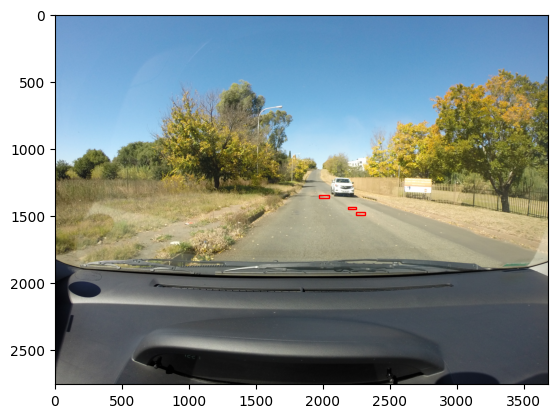

In [71]:
fig, ax = plt.subplots()
t=img.imread('/content/gdrive/MyDrive/Potholes Dataset/Dataset 1 (Simplex)/Test data/'+str(dtest[1][2]))
ax.imshow(t)
for j in range(1,int(dtest[1][3])+1):
    rect = plt.Rectangle((int(dtest[1][4*j]),int(dtest[1][4*j+1])), int(dtest[1][4*j+2]), int(dtest[1][4*j+3]), linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
plt.show

In [79]:
str(dtrain[1][3])

'G0010034.JPG'

<function matplotlib.pyplot.show(close=None, block=None)>

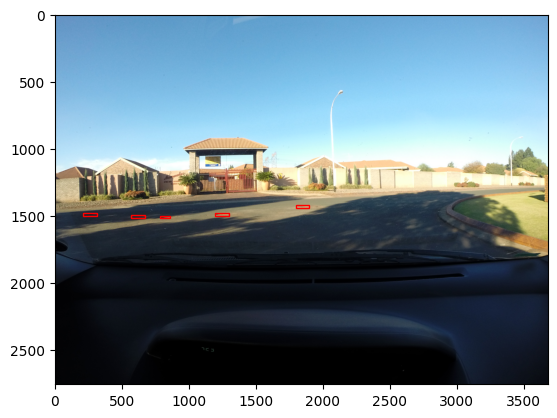

In [81]:
fig, ax = plt.subplots()
t=img.imread('/content/gdrive/MyDrive/Potholes Dataset/Dataset 1 (Simplex)/Train data/Positive data/'+str(dtrain[1][3]))
ax.imshow(t)
for j in range(1,int(dtrain[1][4])+1):
    rect = plt.Rectangle((int(dtrain[1][4*j+1]),int(dtrain[1][4*j+2])), int(dtrain[1][4*j+3]), int(dtrain[1][4*j+4]), linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
plt.show

# Keras VGG16 

In [41]:
#Импорт данных(train and test)
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="/content/gdrive/MyDrive/Potholes Dataset/Dataset 1 (Simplex)/Train data",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="/content/gdrive/MyDrive/Potholes Dataset/Dataset 2 (Complex)/Train data", target_size=(224,224))

Found 4736 images belonging to 2 classes.
Found 7490 images belonging to 2 classes.


In [22]:
model = Sequential() 
#Инициализация VGG16 модели основные идеи- свёртка, активационная функция relu, тк бинарный классификатор, размерность совпадает с заданой размерностью картинок
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [45]:
model.summary()#Резюме модели с архитектурой

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_29 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_31 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 56, 56, 128)      0         
 g2D)                                                 

In [36]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.001)#Настройка градиентного спуска через оптимайзек
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
#Метрики- точность, категориальная перекрестная энтропия

The `lr` argument is deprecated, use `learning_rate` instead.


In [40]:
#Обучение на генераторе
hist = model.fit_generator(steps_per_epoch=10,generator=traindata, validation_data= testdata, validation_steps=10,epochs=10)

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
10/10 [==============================] - ETA: 0s - loss: 0.5980 - accuracy: 0.7156 

10/10 [==============================] - 412s 44s/step - loss: 0.5980 - accuracy: 0.7156 - val_loss: 0.4778 - val_accuracy: 0.8438
Epoch 2/10
10/10 [==============================] - ETA: 0s - loss: 0.5853 - accuracy: 0.7312 

10/10 [==============================] - 435s 47s/step - loss: 0.5853 - accuracy: 0.7312 - val_loss: 0.4974 - val_accuracy: 0.8188
Epoch 3/10
10/10 [==============================] - ETA: 0s - loss: 0.5975 - accuracy: 0.7188 

10/10 [==============================] - 372s 39s/step - loss: 0.5975 - accuracy: 0.7188 - val_loss: 0.4980 - val_accuracy: 0.8250
Epoch 4/10
10/10 [==============================] - ETA: 0s - loss: 0.5974 - accuracy: 0.7156 

10/10 [==============================] - 356s 38s/step - loss: 0.5974 - accuracy: 0.7156 - val_loss: 0.5118 - val_accuracy: 0.8094
Epoch 5/10
10/10 [==============================] - ETA: 0s - loss: 0.5376 - accuracy: 0.7625 

10/10 [==============================] - 363s 38s/step - loss: 0.5376 - accuracy: 0.7625 - val_loss: 0.4826 - val_accuracy: 0.8125
Epoch 6/10
10/10 [==============================] - ETA: 0s - loss: 0.5660 - accuracy: 0.7531 

10/10 [==============================] - 350s 37s/step - loss: 0.5660 - accuracy: 0.7531 - val_loss: 0.4945 - val_accuracy: 0.8531
Epoch 7/10
10/10 [==============================] - ETA: 0s - loss: 0.5867 - accuracy: 0.7312 

10/10 [==============================] - 357s 38s/step - loss: 0.5867 - accuracy: 0.7312 - val_loss: 0.4658 - val_accuracy: 0.8438
Epoch 8/10
10/10 [==============================] - ETA: 0s - loss: 0.6015 - accuracy: 0.7156 

10/10 [==============================] - 342s 36s/step - loss: 0.6015 - accuracy: 0.7156 - val_loss: 0.5014 - val_accuracy: 0.8219
Epoch 9/10
10/10 [==============================] - ETA: 0s - loss: 0.5975 - accuracy: 0.7188 

10/10 [==============================] - 353s 38s/step - loss: 0.5975 - accuracy: 0.7188 - val_loss: 0.5192 - val_accuracy: 0.8000
Epoch 10/10
10/10 [==============================] - ETA: 0s - loss: 0.6521 - accuracy: 0.6500 

10/10 [==============================] - 353s 38s/step - loss: 0.6521 - accuracy: 0.6500 - val_loss: 0.5283 - val_accuracy: 0.8469


In [46]:
hist.history #Массив метрик

{'loss': [0.5979827642440796,
  0.5852636098861694,
  0.5974819660186768,
  0.5974456071853638,
  0.5375512838363647,
  0.5660380721092224,
  0.5867499113082886,
  0.6014979481697083,
  0.5975047945976257,
  0.6521381139755249],
 'accuracy': [0.715624988079071,
  0.731249988079071,
  0.71875,
  0.715624988079071,
  0.762499988079071,
  0.753125011920929,
  0.731249988079071,
  0.715624988079071,
  0.71875,
  0.6499999761581421],
 'val_loss': [0.4777916967868805,
  0.4973932206630707,
  0.4979616105556488,
  0.5117769241333008,
  0.48262518644332886,
  0.4945463240146637,
  0.4658321440219879,
  0.5013995170593262,
  0.5192035436630249,
  0.5283456444740295],
 'val_accuracy': [0.84375,
  0.8187500238418579,
  0.824999988079071,
  0.809374988079071,
  0.8125,
  0.8531249761581421,
  0.84375,
  0.8218749761581421,
  0.800000011920929,
  0.846875011920929]}

In [59]:
max(hist.history['accuracy'])#max accuracy

0.762499988079071

In [60]:
hist.history['accuracy'].index(max(hist.history['accuracy'])) #epoch with max accuracy

4

In [61]:
min(hist.history['loss'])#min loss

0.5375512838363647

In [62]:
min(hist.history['val_loss'])#min val loss

0.4658321440219879

In [63]:
hist.history['val_loss'].index(min(hist.history['val_loss'])) #epoch with min val_loss

6

In [64]:
max(hist.history['val_accuracy'])#max val_accuracy

0.8531249761581421

# Jolo 8


In [8]:
%pip install ultralytics

Ultralytics YOLOv8.0.89 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.4/78.2 GB disk)


In [ ]:
import ultralytics
ultralytics.checks()#проверка установки

In [10]:
!pip install roboflow #Для взаимодействия с данными 
from roboflow import Roboflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Создание необходимого label списка с координатами боксов в формате левый верхний угол- правый нижний
ans1=[]
for i in range(len(dtrain)):
  ans=[]
  for j in range(1,int(dtrain[i][4])+1):
    ans.append((0,dtrain[i][j*4+1],int(dtrain[i][j*4+2])+int(dtrain[i][j*4+4]), int(dtrain[i][j*4+1])+int(dtrain[i][j*4+3]), dtrain[i][j*4+2]))
  ans1.append(ans)
for i in range(len(ans1)):#Сохранение файлов на диск с координатами и результатами
  np.savetxt('/content/gdrive/MyDrive/for_yolo1/test'+str(i)+'.txt', ans1[i],fmt='%s',delimiter=' ')

In [11]:
rf = Roboflow(api_key="gYavA7LZ11PvEtxDpOzT")
project = rf.workspace("nikolay-schezhin-nvsmb").project("roaddetection-e5a3v")#Подключение данных через  Roboflow с лейблами
dataset = project.version(6).download("yolov8")#Установка yolo

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.89, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to roaddetection-6 in yolov8:: 100%|██████████| 1202/1202 [00:00<00:00, 2153.31it/s]


In [12]:
!yolo task=detect mode=train model=yolov8m.pt data=/content/roaddetection-6/data.yaml epochs=30 imgsz=640
#Обучение на детектинг по размеченым боксам

100% 49.7M/49.7M [00:00<00:00, 358MB/s]
Ultralytics YOLOv8.0.89 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/roaddetection-6/data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, 

In [84]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.2 source=/content/roaddetection-6/test/images
#Для тестовых данных

Ultralytics YOLOv8.0.89 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/27 /content/roaddetection-6/test/images/G0010761_JPG.rf.cd819d766fb71f29fa98fc02c1cc91a7.jpg: 640x640 1 troubles, 36.3ms
image 2/27 /content/roaddetection-6/test/images/G0010765_JPG.rf.996a3fd31171fd8d8a269d518c891e3e.jpg: 640x640 2 troubless, 38.4ms
image 3/27 /content/roaddetection-6/test/images/G0011564_JPG.rf.378896749bf63c5b76773d5ba3ca707a.jpg: 640x640 (no detections), 36.2ms
image 4/27 /content/roaddetection-6/test/images/G0016154_JPG.rf.2b47c80cc220cd7adc0f2caa86770864.jpg: 640x640 (no detections), 36.2ms
image 5/27 /content/roaddetection-6/test/images/G0028718_JPG.rf.ccdaaa060bbdd8810e999bcbfc10065c.jpg: 640x640 1 troubles, 36.2ms
image 6/27 /content/roaddetection-6/test/images/G0028891_JPG.rf.bcaef9241890bfe1826f1a5657beb884.jpg: 640x640 1 troubles, 36.2ms
image 7/27 /content/roaddetection-6/test/image

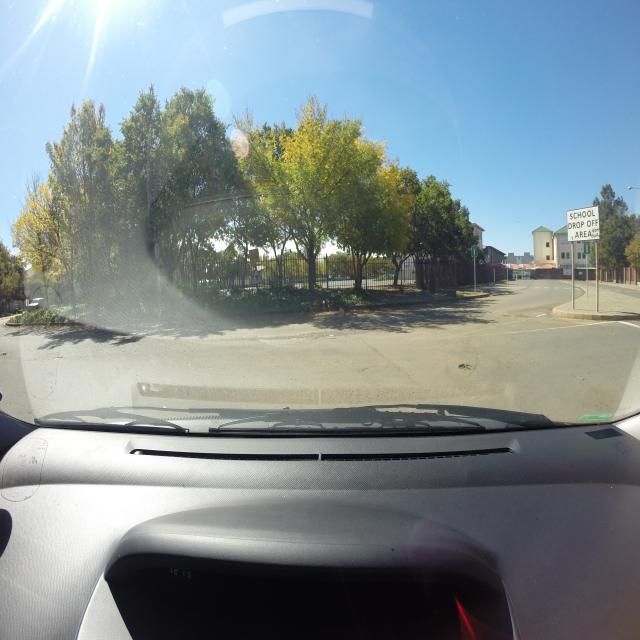

In [ ]:
Image(filename='/content/runs/detect/train/val_batch0_labels.jpg', height=600)
#Пример на валидационной выборке (из тестового датасета)